**DEEKSHA SATISH NAYAK**

**20BTRCD004**


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

In [4]:
data =pd.read_csv("all_stocks_5yr.csv")

In [5]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [7]:
#I just picked the first stock
data = data[data.Name == 'AAL']

In [8]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


In [9]:
data.corr()

,open,high,low,close,volume
open,1.000000,0.999059,0.998799,0.997690,-0.001996
high,0.999059,1.000000,0.998724,0.998964,0.008243
low,0.998799,0.998724,1.000000,0.998957,-0.017993
close,0.997690,0.998964,0.998957,1.000000,-0.004733
volume,-0.001996,0.008243,-0.017993,-0.004733,1.000000


In [10]:
data.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,38.390495,38.955554,37.825605,38.393252,9.390321e+06
std,10.967086,11.073650,10.843652,10.957636,6.899305e+06
min,13.140000,13.420000,12.700000,13.020000,1.352400e+06
25%,34.205000,34.930000,33.690000,34.330000,5.696393e+06
50%,40.930000,41.429500,40.209900,40.870000,8.111323e+06
75%,46.565000,47.187500,45.990000,46.535000,1.118854e+07
max,58.790000,59.080000,57.800000,58.470000,1.377672e+08


Let's first use monte carlo simulation for forecasting 

In [8]:
from scipy.stats import norm
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 250 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last  closing price .

In [9]:
S0 = data.close.iloc[-1]
S0

51.4

In [10]:
#Let us first create en empty matrix such as daily returns
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[51.4, 51.4, 51.4, ..., 51.4, 51.4, 51.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [11]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000
1,53.558858,50.500800,53.671358,51.263275,51.286860,49.908122,53.030270,50.795624,49.542761,50.712068,53.558858
2,55.506065,50.346043,51.614284,51.905909,51.546738,49.822018,53.303427,52.033099,48.702196,50.436752,55.506065
3,52.352545,49.864309,50.410410,51.930449,49.902356,50.636801,51.640435,50.200763,48.597732,50.131278,52.352545
4,49.927118,50.955928,50.572738,53.988045,48.901791,49.191183,52.674548,50.797803,47.688508,51.496090,49.927118


In [12]:
close = data.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

In [13]:
monte_carlo_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
monte_carlo_forecast.tail()

,close,0,1,2,3,4,5,6,7,8,9
245,107.240138,107.240138,47.239169,37.797322,73.764794,24.101247,46.272882,39.540939,59.207422,82.557884,73.037711
246,108.032532,108.032532,46.089837,36.445811,75.226877,23.228242,48.460937,38.478630,57.781436,81.860316,73.203211
247,110.904177,110.904177,45.333521,36.014026,75.451832,23.259180,46.959248,36.650908,56.352859,81.395705,73.298189
248,110.450296,110.450296,45.185815,35.747336,75.794090,23.948669,48.635941,36.408690,59.652269,79.330639,74.671720
249,105.551699,105.551699,45.161828,36.038942,79.446604,24.141932,47.918125,36.602638,59.438912,79.847350,74.406312


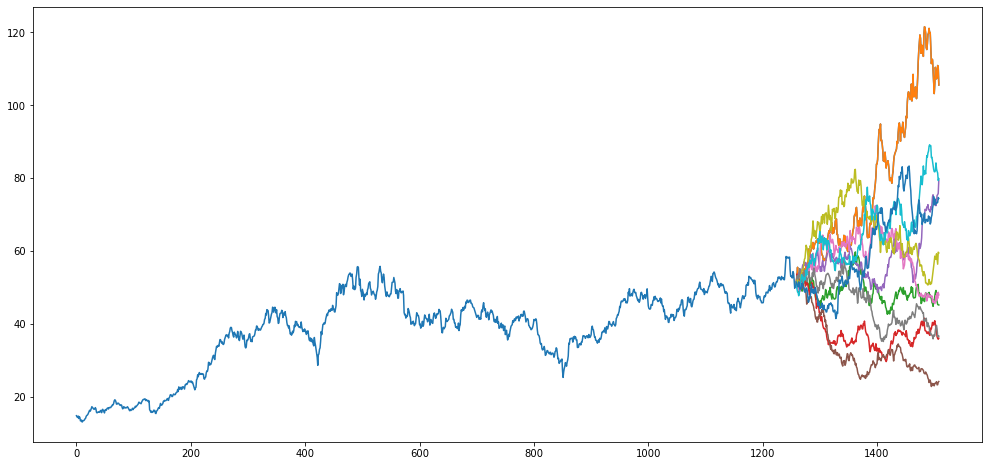

In [15]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()